- ID - unique ID of offer
- Price - value of the price
- Currency - currency of the price (mostly polish złoty, but also some euro)
- Condition - new or used
- Vehicle_brand - brand of vehicle in offer
- Vehicle_model - model of vehicle in offer
- Vehicle_generation - generation of vehicle in offer
- Vehicle_version - version of vehicle in offer
- Production_year - year of car production
- Mileage_km - total distance that the car has driven in kilometers
- Power_HP - car engine power in horsepower
- Displacement_cm3 - car engine size in cubic centimeters
- Fuel_type - car fuel type
- CO2_emissions - car CO2 emissions in g/km
- Drive - type of car drive
- Transmission - type of car transmission
- Type - car body style
- Doors_number - number of car doors
- Colour - car body color
- Origin_country - country of origin of the car
- First_owner - whether the owner is the first owner
- First_registration_date - date of first registration
- Offer_publication_date - date of publication of the offer
- Offer_location - address provided by the issuer
- Features - listed car features (ABS, airbag, parking sensors e.t.c)

데이터셋 : 2021/3/26부터 2021/5/5까지 폴란드에서 가장 큰 차 광고 사이트 중 하나에 올라온 200,000개의 자동차 데이터셋

This dataset was created by webscraping over 200,000 car offers from one of the largest car advertisement sites in Poland.

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [168]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.options.display.float_format = '{:.2f}'.format

In [169]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [170]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Car_sale_ads.csv')
df.head()

,Index,Price,Currency,Condition,Vehicle_brand,Vehicle_model,Vehicle_version,Vehicle_generation,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,CO2_emissions,Drive,Transmission,Type,Doors_number,Colour,Origin_country,First_owner,First_registration_date,Offer_publication_date,Offer_location,Features
0,0,86200,PLN,New,Abarth,595,NaN,NaN,2021,1.00,145.00,1400.00,Gasoline,NaN,Front wheels,Manual,small_cars,3.00,gray,NaN,NaN,NaN,04/05/2021,"ul. Jubilerska 6 - 04-190 Warszawa, Mazowiecki...",[]
1,1,43500,PLN,Used,Abarth,Other,NaN,NaN,1974,59000.00,75.00,1100.00,Gasoline,NaN,Front wheels,Manual,coupe,2.00,silver,NaN,NaN,NaN,03/05/2021,"kanonierska12 - 04-425 Warszawa, Rembertów (Po...",[]
2,2,44900,PLN,Used,Abarth,500,NaN,NaN,2018,52000.00,180.00,1368.00,Gasoline,NaN,NaN,Automatic,small_cars,3.00,silver,NaN,NaN,NaN,03/05/2021,"Warszawa, Mazowieckie, Białołęka","['ABS', 'Electric front windows', 'Drivers air..."
3,3,39900,PLN,Used,Abarth,500,NaN,NaN,2012,29000.00,160.00,1368.00,Gasoline,139.00,Front wheels,Manual,small_cars,3.00,gray,NaN,NaN,NaN,30/04/2021,"Jaworzno, Śląskie","['ABS', 'Electric front windows', 'Drivers air..."
4,4,97900,PLN,New,Abarth,595,NaN,NaN,2021,600.00,165.00,1368.00,Gasoline,NaN,NaN,Manual,small_cars,3.00,blue,NaN,NaN,NaN,30/04/2021,"ul. Gorzysława 9 - 61-057 Poznań, Nowe Miasto ...","['ABS', 'Electrically adjustable mirrors', 'Pa..."


In [171]:
brand = df.groupby('Vehicle_brand')['Price'].count().sort_values()
brand

Vehicle_brand
Vanderhall            1
Talbot                1
FAW                   1
NSU                   1
Scion                 1
Santana               1
Saturn                1
MAN                   1
Autobianchi           2
Vauxhall              2
Tavria                2
Grecav                2
Zaporożec             3
Maybach               3
Baic                  3
Lotus                 4
Mercury               4
Casalini              4
Nysa                  5
DKW                   5
Zastava               6
DFSK                  6
Iveco                 6
Tarpan                6
Alpine                7
Moskwicz              7
Syrena                7
Chatenet              8
Wartburg              9
Triumph               9
Gaz                  10
Żuk                  10
Plymouth             11
Tata                 11
Wołga                11
Warszawa             13
GMC                  15
Austin               16
Acura                16
Oldsmobile           18
McLaren              18
Ua

# 1. 데이터 전처리

In [172]:
df_clean = df.copy()

In [173]:
df_clean.shape

(208304, 25)

In [174]:
(df_clean['Condition'] == 'New').sum()

25454

In [175]:
# Condition 컬럼이 'New'인 차량 삭제
new_idx = df_clean[df_clean.Condition == 'New'].index
df_clean = df_clean.drop(new_idx)
    
# 불필요한 특성 제거 
df_clean = df_clean.drop(['Index', 'Condition', 'Vehicle_version', 'Vehicle_generation', 'CO2_emissions',
            'Origin_country', 'First_owner', 'First_registration_date', 
            'Offer_publication_date', 'Offer_location'], axis = 1)

In [176]:
df_clean.shape

(182850, 15)

### 1.1 이상치 처리 및 분포 확인

In [177]:
df_clean.isnull().sum()

Price                   0
Currency                0
Vehicle_brand           0
Vehicle_model           0
Production_year         0
Mileage_km              0
Power_HP              594
Displacement_cm3     1215
Fuel_type               0
Drive               14538
Transmission          462
Type                    0
Doors_number         1209
Colour                  0
Features                0
dtype: int64

In [178]:
# price (2021년 5월 기준 미국 달러로 환율 통일, 1PLN -> 0.27$, 1Euro -> 1.2$)
PLN_idx = df_clean[df_clean.Currency == 'PLN'].index
EUR_idx = df_clean[df_clean.Currency == 'EUR'].index

df_clean.Price[PLN_idx] *= 0.27
df_clean.Price[EUR_idx] *= 1.2

# Currency 컬럼 제거
df_clean = df_clean.drop('Currency', axis = 1)

<ipython-input-178-07ad2c7a6e24>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.Price[PLN_idx] *= 0.27


##### 1.1.a 수치형 변수

In [179]:
df_clean.describe()

,Price,Production_year,Mileage_km,Power_HP,Displacement_cm3,Doors_number
count,182850.00,182850.00,182850.00,182256.00,181635.00,181641.00
mean,13357.17,2010.91,170374.88,149.32,1909.78,4.61
std,18795.90,6.65,3127291.35,75.48,733.14,0.80
min,161.73,1915.00,1.00,1.00,400.00,1.00
25%,4317.30,2007.00,91000.00,105.00,1498.00,5.00
50%,8073.00,2011.00,160000.00,136.00,1800.00,5.00
75%,15660.00,2016.00,215000.00,170.00,1997.00,5.00
max,1889730.00,2021.00,1111111111.00,1398.00,8400.00,55.00


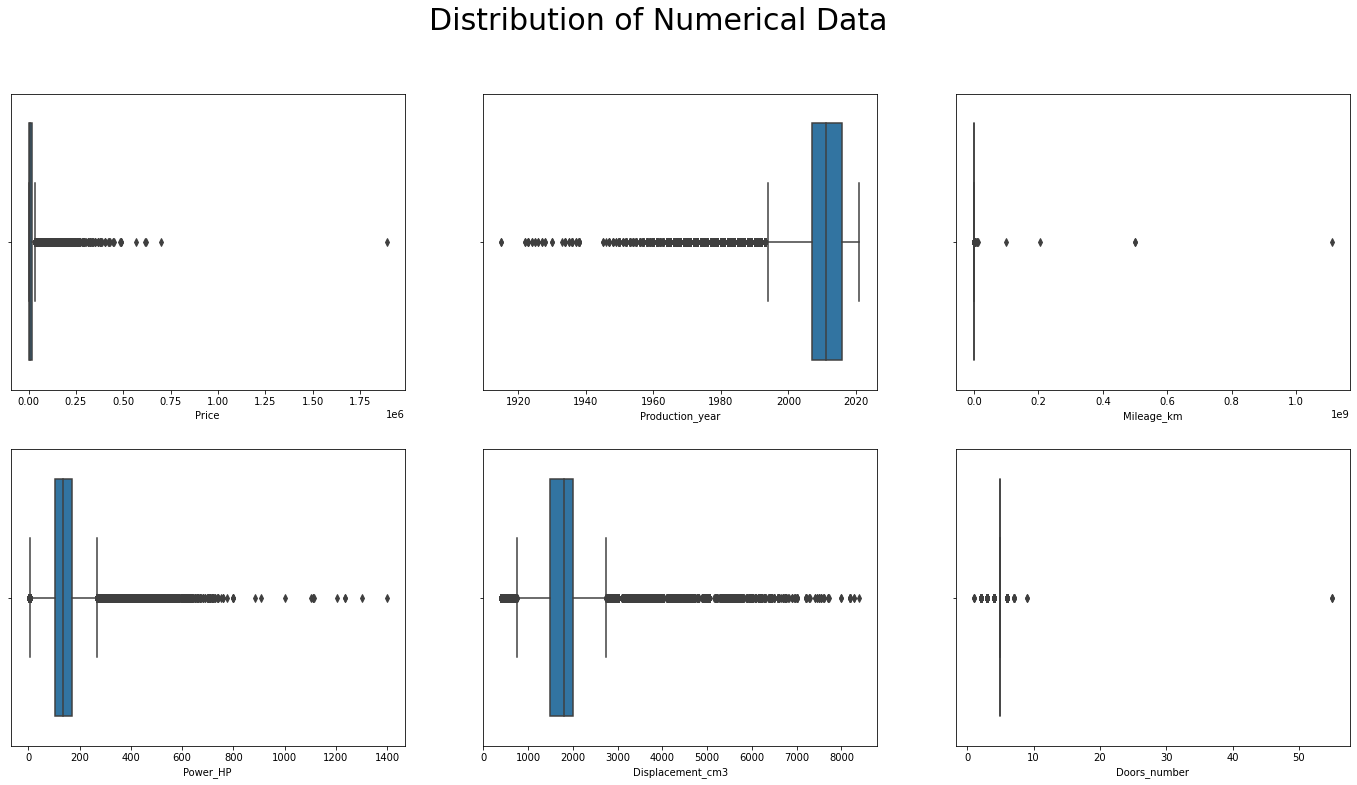

In [180]:
fig = plt.figure()
fig.set_size_inches(24, 12)
(ax1, ax2, ax3), (ax4, ax5, ax6) = fig.subplots(nrows = 2, ncols = 3)
sns.boxplot(data = df_clean, x = 'Price', ax = ax1)

sns.boxplot(data = df_clean, x = 'Production_year', ax = ax2)

sns.boxplot(data = df_clean, x = 'Mileage_km', ax = ax3)

sns.boxplot(data = df_clean, x = 'Power_HP', ax = ax4)

sns.boxplot(data = df_clean, x = 'Displacement_cm3', ax = ax5)

sns.boxplot(data = df_clean, x = 'Doors_number', ax = ax6)

plt.suptitle('Distribution of Numerical Data', size = 30)
plt.show()

In [181]:
# Price: 100000 초과 제외
# Production_year: 1990 미만 제외
# Mileage_km : 206000 초과 제외
# Power_HP : 800 초과 제외
# Doors_number : 5 초과 제외

df_clean = df_clean[(df_clean['Price'] <= 100000) & (df_clean['Production_year'] >= 1990) &
        (df_clean['Mileage_km'] <= 206000) & (df_clean['Power_HP'] <= 800) & (df_clean['Doors_number'] <= 5)]

df_clean.shape

(127595, 14)

##### 1.1.b 범주형 변수

In [182]:
df_clean.describe(exclude = [np.number])

,Vehicle_brand,Vehicle_model,Fuel_type,Drive,Transmission,Type,Colour,Features
count,127595,127595,127595,119200,127543,127595,127595,127595
unique,92,997,7,5,2,9,14,112656
top,Opel,Astra,Gasoline,Front wheels,Manual,SUV,black,[]
freq,11125,3936,68483,88800,83565,23841,30488,6425


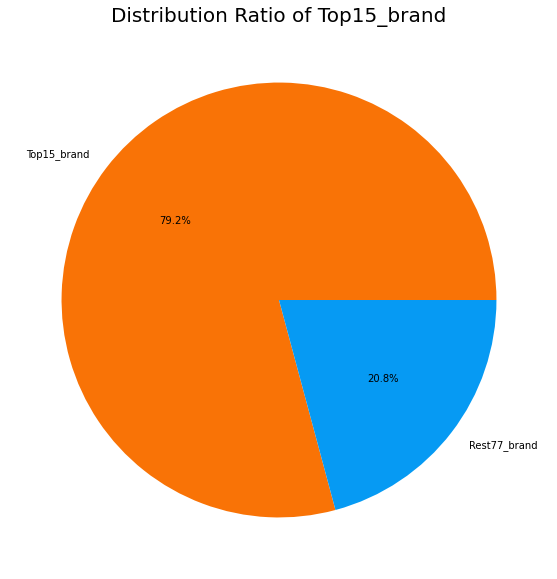

In [183]:
brand = df_clean.groupby('Vehicle_brand')['Price'].count().sort_values(ascending=False)
top15_brand = brand.head(15).sum()
rest_brand = brand.sum() - top15_brand
ratio = [top15_brand, rest_brand]
color = ['#F97306', '#069AF3']
plt.figure(figsize = (10, 10))
plt.pie(ratio, labels = ['Top15_brand', 'Rest77_brand'], colors = color, autopct = '%.1f%%')
plt.title('Distribution Ratio of Top15_brand', size = 20)
plt.show()

In [184]:
# df.Vehicle_brand 상위 15개 활용
using_brand = df_clean.groupby('Vehicle_brand')['Price'].count().sort_values(ascending=False).head(15).index
df_clean = df_clean[df_clean.Vehicle_brand.isin(using_brand)]
df_clean.Vehicle_brand.unique()

array(['Audi', 'BMW', 'Citroën', 'Ford', 'Hyundai', 'Kia',
       'Mercedes-Benz', 'Nissan', 'Opel', 'Volkswagen', 'Peugeot',
       'Renault', 'Škoda', 'Toyota', 'Volvo'], dtype=object)

In [185]:
df_clean.Vehicle_model.unique()

array(['100', '80', 'A1', 'A2', 'A3', 'A4 Allroad', 'A4', 'A5',
       'A6 Allroad', 'A6', 'A7', 'A8', 'Cabriolet', 'Coupe', 'e-tron',
       'Q2', 'Q3', 'Q5', 'Q7', 'Q8', 'R8', 'RS Q3', 'RS3', 'RS4', 'RS5',
       'RS6', 'RS7', 'S1', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'SQ5',
       'SQ7', 'TT RS', 'TT S', 'TT', '1M', '3GT', 'Seria 3', '5GT', '6GT',
       'i3', 'i8', 'M2', 'M3', 'M4', 'M5', 'M6', 'Other', 'Seria 1',
       'Seria 2', 'Seria 4', 'Seria 5', 'Seria 6', 'Seria 7', 'Seria 8',
       'X1', 'X2', 'X3 M', 'X3', 'X4', 'X5 M', 'X5', 'X6 M', 'X6', 'X7',
       'Z3', 'Z4', 'C1', 'Xsara Picasso', 'C4 Picasso', 'C3', 'C4',
       'C3 Picasso', 'Berlingo', 'C4 SpaceTourer', 'Xsara', 'DS4',
       'C-Elysée', 'C4 Grand Picasso', 'C5', 'DS3', 'DS5', 'C4 Cactus',
       'C3 Aircross', 'C4 Aircross', 'Jumper', 'C2', 'Jumpy Combi',
       'Nemo', 'C-Crosser', 'C5 Aircross', 'C8', 'C3 Pluriel', 'ZX',
       'SpaceTourer', 'Saxo', 'Xantia', 'C6', 'BX', 'XM', 'DS', 'AX',
       'B-MAX', 'C

In [186]:
other = df_clean[df_clean.Vehicle_model == 'Other']
idx = other.index

df_clean.loc[idx, 'Vehicle_model'] = np.nan

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [187]:
df_clean.groupby('Fuel_type')['Price'].count()

Fuel_type
Diesel            44733
Electric            595
Gasoline          50360
Gasoline + CNG       29
Gasoline + LPG     2718
Hybrid             2594
Hydrogen              2
Name: Price, dtype: int64

In [188]:
# 수소차, 가솔린 + CNG 하이브리드 차, Electric 는 각각 2대, 29대, 595대로 표본 수가 적어 제외
not_using_fuel_type = ['Hydrogen', 'Gasoline + CNG', 'Electric']
df_clean = df_clean[~df_clean.Fuel_type.isin(not_using_fuel_type)]
df_clean.shape

(100405, 14)

In [189]:
df_clean.groupby('Drive')['Price'].count()

Drive
4x4 (attached automatically)     6040
4x4 (attached manually)           933
4x4 (permanent)                  7966
Front wheels                    71559
Rear wheels                      7548
Name: Price, dtype: int64

In [190]:
df_clean.groupby('Type')['Price'].count()

Type
SUV              16531
city_cars        13510
compact          17448
convertible       1303
coupe             3133
minivan          10557
sedan            15451
small_cars        2713
station_wagon    19759
Name: Price, dtype: int64

In [191]:
# city_cars, compact, small_cars 는 모두 소형차를 의미하며 같은 모델도 Type이 다르게 분류되어 있어 compact로 통일
compact = ['city_cars', 'compact', 'small_cars']
compact_idx = df_clean[df_clean.Type.isin(compact)].index
df_clean.loc[compact_idx, 'Type'] = 'compact'

In [192]:
df_clean.groupby('Colour')['Price'].count()

Colour
beige        1243
black       24437
blue         9804
brown        3148
burgundy     1630
golden       1265
gray        15574
green        1184
other        6285
red          3758
silver      15212
violet        380
white       16194
yellow        291
Name: Price, dtype: int64

### 1.2 결측치 처리

In [193]:
df_clean.isnull().sum()

Price                  0
Vehicle_brand          0
Vehicle_model         94
Production_year        0
Mileage_km             0
Power_HP               0
Displacement_cm3      15
Fuel_type              0
Drive               6359
Transmission          38
Type                   0
Doors_number           0
Colour                 0
Features               0
dtype: int64

##### 1.2.a Displacement_cm3 결측치 처리

In [194]:
df_clean[df_clean.Displacement_cm3.isnull()].head()

,Price,Vehicle_brand,Vehicle_model,Production_year,Mileage_km,Power_HP,Displacement_cm3,Fuel_type,Drive,Transmission,Type,Doors_number,Colour,Features
17704,48330.00,Audi,S5,2017,28500.00,354.00,NaN,Gasoline,4x4 (permanent),NaN,sedan,4.00,silver,"['ABS', 'Electric front windows', 'Drivers air..."
57823,1781.73,Ford,Focus,2004,203000.00,100.00,NaN,Gasoline,Front wheels,Manual,station_wagon,5.00,silver,"['ABS', 'Electric front windows', 'Drivers air..."
85397,9585.00,Kia,Cerato,2014,162000.00,127.00,NaN,Gasoline,Front wheels,Automatic,sedan,5.00,black,"['ABS', 'Electrically adjustable mirrors', 'Dr..."
86385,7560.00,Kia,Ceed,2012,131065.00,128.00,NaN,Diesel,Front wheels,Manual,compact,5.00,white,"['Rear parking sensors', 'Electrochromic rear ..."
96607,33723.00,Mercedes-Benz,Klasa A,2020,7000.00,136.00,NaN,Gasoline,Front wheels,Automatic,compact,4.00,white,[]


In [195]:
# 전기차의 배기량 0으로 설정

idx = df_clean[df_clean['Fuel_type'] == 'Electric'].index
df_clean.loc[idx, 'Displacement_cm3'] = 0

In [196]:
# 전기차가 아닌 차들 중 배기량이 결측치인 차는 브랜드, 모델, fuel_type, 마력, type이 같은 차의 배기량을 참고하여 결측치 대체

null_non_electric = df_clean[(df_clean.Fuel_type != 'Electric') & (df_clean.Displacement_cm3.isnull())]
null_non_electric = null_non_electric[['Vehicle_brand', 'Vehicle_model', 'Fuel_type', 'Power_HP', 'Type']]
null_non_electric_idx = null_non_electric.index

for i in null_non_electric_idx:
    condition = ((df_clean['Vehicle_brand'] == null_non_electric.loc[i, 'Vehicle_brand']) &
                (df_clean['Vehicle_model'] == null_non_electric.loc[i, 'Vehicle_model']) &
                (df_clean['Fuel_type'] == null_non_electric.loc[i, 'Fuel_type']) & 
                (df_clean['Power_HP'] == null_non_electric.loc[i, 'Power_HP']) & 
                (df_clean['Type'] == null_non_electric.loc[i, 'Type']))
    
    if len(df_clean[condition]['Displacement_cm3']) == 1:
        continue
    else:
        df_clean.loc[i, 'Displacement_cm3'] = df_clean[condition]['Displacement_cm3'].mode()[0]


In [197]:
df_clean.isnull().sum()

Price                  0
Vehicle_brand          0
Vehicle_model         94
Production_year        0
Mileage_km             0
Power_HP               0
Displacement_cm3       3
Fuel_type              0
Drive               6359
Transmission          38
Type                   0
Doors_number           0
Colour                 0
Features               0
dtype: int64

In [198]:
# 배기량을 알 수 없는 차 3대의 데이터를 구글링하여 대체

df_clean.loc[85397, 'Displacement_cm3'] = 1582
df_clean.loc[107164, 'Displacement_cm3'] = 5461
df_clean.loc[168082, 'Displacement_cm3'] = 1798


In [199]:
(df_clean.Displacement_cm3.isnull()).sum()

0

##### 1.2.b Drive 결측치

In [200]:
# 최빈값으로 대체

df_clean.Drive.fillna(df_clean.Drive.mode()[0], inplace = True)

In [201]:
df_clean.isnull().sum()

Price                0
Vehicle_brand        0
Vehicle_model       94
Production_year      0
Mileage_km           0
Power_HP             0
Displacement_cm3     0
Fuel_type            0
Drive                0
Transmission        38
Type                 0
Doors_number         0
Colour               0
Features             0
dtype: int64

##### 1.2.c Transmission 결측치

In [202]:
# 최빈값으로 대체

df_clean.Transmission.fillna(df_clean.Transmission.mode()[0], inplace = True)

In [203]:
df_clean.isnull().sum()

Price                0
Vehicle_brand        0
Vehicle_model       94
Production_year      0
Mileage_km           0
Power_HP             0
Displacement_cm3     0
Fuel_type            0
Drive                0
Transmission         0
Type                 0
Doors_number         0
Colour               0
Features             0
dtype: int64

##### 1.2.d Vehicle_model 결측치

In [204]:
# 정렬 후 위 값으로 대체
idx = df_clean[df_clean.Vehicle_model.isnull()].index

df_copy = df_clean.copy()
df_copy = df_copy.sort_values(by = ['Vehicle_brand', 'Vehicle_model', 'Production_year'])
df_copy.loc[idx, 'Vehicle_model'] = (df_copy['Vehicle_model']).ffill()
df_clean.loc[idx, 'Vehicle_model'] = df_copy.loc[idx, 'Vehicle_model']

In [205]:
df_clean.isnull().sum()

Price               0
Vehicle_brand       0
Vehicle_model       0
Production_year     0
Mileage_km          0
Power_HP            0
Displacement_cm3    0
Fuel_type           0
Drive               0
Transmission        0
Type                0
Doors_number        0
Colour              0
Features            0
dtype: int64

### 1.3 데이터타입 변환

In [206]:
df_clean.dtypes

Price               float64
Vehicle_brand        object
Vehicle_model        object
Production_year       int64
Mileage_km          float64
Power_HP            float64
Displacement_cm3    float64
Fuel_type            object
Drive                object
Transmission         object
Type                 object
Doors_number        float64
Colour               object
Features             object
dtype: object

In [207]:
# Mileage_km, Doors_number, Power_HP, Displacement_cm3 : float -> int

df_clean = df_clean.astype({'Mileage_km' : 'int', 'Doors_number' : 'int',
                             'Power_HP' : 'int', 'Displacement_cm3' : 'int'})

### 1.4 중복값 확인

In [208]:
df_clean.duplicated().sum()

810

In [209]:
df_clean.drop_duplicates(inplace = True)
df_clean.duplicated().sum()

0

### 1.5 Feature engineering

In [210]:
df_clean = df_clean.reset_index(drop = True)

In [211]:
# 훈련 데이터 train, test 날짜 기준으로 가능할까?
# df_clean.Offer_publication_date = pd.to_datetime(df_clean.Offer_publication_date, dayfirst = True)
# df_clean.groupby('Offer_publication_date')['Index'].count().sort_index()

In [212]:
# df[(df.Production_year == 2021) & (df.Condition == 'Used')].head(10)

In [213]:
# Production_year -> years_after_produced (2021년 기준 생산년도로부터 몇년 지났는지)
years_after_produced = 2021 - df_clean.Production_year
df_clean['Production_year'] = years_after_produced

df_clean.rename({'Production_year' : 'Years_after_produced'}, axis = 1, inplace = True)

In [214]:
# features -> num_options (차량 옵션 수)
idx = df_clean[df['Features'] == '[]'].index

features = df_clean['Features'].str.count(',') + 1
features[idx] = 0

df_clean['Features'] = features
df_clean.rename({'Features': 'Num_options'}, axis = 1, inplace = True)

<ipython-input-214-95fbb0b99d59>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  idx = df_clean[df['Features'] == '[]'].index


In [215]:
# Displacement_cm3 활용 Num_cylinders(기통 수) 컬럼 생성
idx_3 = df_clean[df_clean.Displacement_cm3 <= 1400].index
idx_4 = df_clean[(df_clean.Displacement_cm3 > 1400) & (df_clean.Displacement_cm3 <= 2400)].index
idx_6 = df_clean[(df_clean.Displacement_cm3 > 2400) & (df_clean.Displacement_cm3 <= 5000)].index
idx_8 = df_clean[(df_clean.Displacement_cm3 > 5000) & (df_clean.Displacement_cm3 <= 6000)].index
idx_12 = df_clean[(df_clean.Displacement_cm3 > 6000)].index

Num_cylinders = pd.Series([0] * len(df))
Num_cylinders[idx_3] = 3
Num_cylinders[idx_4] = 4
Num_cylinders[idx_6] = 6
Num_cylinders[idx_8] = 8
Num_cylinders[idx_12] = 12

df_clean['Num_cylinders'] = Num_cylinders

In [216]:
# 신차 평균가격 컬럼 생성(2019년 statista 자료 활용)
brand_name = ['Audi', 'BMW', 'Citroën', 'Ford', 'Hyundai', 'Kia',
              'Mercedes-Benz', 'Nissan', 'Opel', 'Volkswagen', 'Peugeot',
              'Renault', 'Škoda', 'Toyota', 'Volvo']

brand_name_idx = []
for i in range(len(brand_name)):
  brand_name_idx.append(df_clean.Vehicle_brand[df_clean.Vehicle_brand == brand_name[i]].index)

brand_avg_price = pd.Series([0] * len(df_clean))
avg_price = [44777, 50259, 22343, 27032, 24190, 24750, 48413, 28307, 22891, 30762, 26470, 23081, 26191, 25480, 47111]

for i in range(len(brand_name)):
  brand_avg_price[brand_name_idx[i]] = avg_price[i]

df_clean['newcar_avgprice_by_brand'] = brand_avg_price

In [217]:
df_clean.Vehicle_brand.unique()

array(['Audi', 'BMW', 'Citroën', 'Ford', 'Hyundai', 'Kia',
       'Mercedes-Benz', 'Nissan', 'Opel', 'Volkswagen', 'Peugeot',
       'Renault', 'Škoda', 'Toyota', 'Volvo'], dtype=object)

In [218]:
# 컬럼 명 변경
df_clean.rename({'Vehicle_brand' : 'Brand', 'Vehicle_model' : 'Model'}, axis = 1, inplace = True)

In [219]:
df_clean = df_clean.reset_index(drop = True)

In [220]:
df = df_clean

In [221]:
df.shape

(99595, 16)

# 2. EDA 및 시각화
---

In [222]:
df.columns

Index(['Price', 'Brand', 'Model', 'Years_after_produced', 'Mileage_km',
       'Power_HP', 'Displacement_cm3', 'Fuel_type', 'Drive', 'Transmission',
       'Type', 'Doors_number', 'Colour', 'Num_options', 'Num_cylinders',
       'newcar_avgprice_by_brand'],
      dtype='object')

In [223]:
def hist (col, a, b):
  plt.figure(figsize = (a, b))
  sns.histplot(data = df, x = col, kde = True)
  plt.xlabel(col, fontsize = 12)
  plt.ylabel('Count', fontsize = 12)

def group_bar (col, a, b):
  dataframe = pd.DataFrame(df.groupby(col)['Price'].count()).sort_values(by = 'Price', ascending = False).reset_index()
  
  plt.figure(figsize = (a, b))
  sns.barplot(data = dataframe, x = col, y = 'Price')
  plt.xlabel(col, fontsize = 12)
  plt.ylabel('Count', fontsize = 12)

def group_mean (col, a, b):
  dataframe = pd.DataFrame(df.groupby(col)['Price'].mean()).sort_values(by = 'Price', ascending = False).reset_index()
  
  plt.figure(figsize = (a, b))
  sns.barplot(data = dataframe, x = col, y = 'Price')
  plt.xlabel(col, fontsize = 12)
  plt.ylabel('Mean_Price', fontsize = 12)

### 2.1 수치형 변수 ('Price', 'Years_after_produced', 'Mileage_km', 'Power_HP', 'Displacement_cm3')

##### 2.1.a Price column

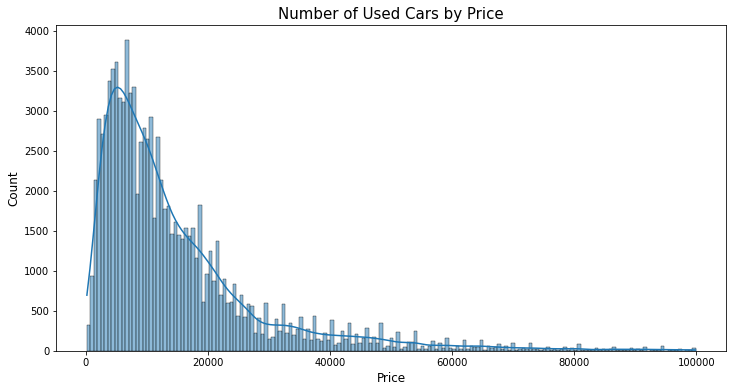

In [224]:
hist('Price', 12, 6)
plt.title('Number of Used Cars by Price', fontsize = 15)
plt.show()

##### 2.1.b Years_after_produced

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


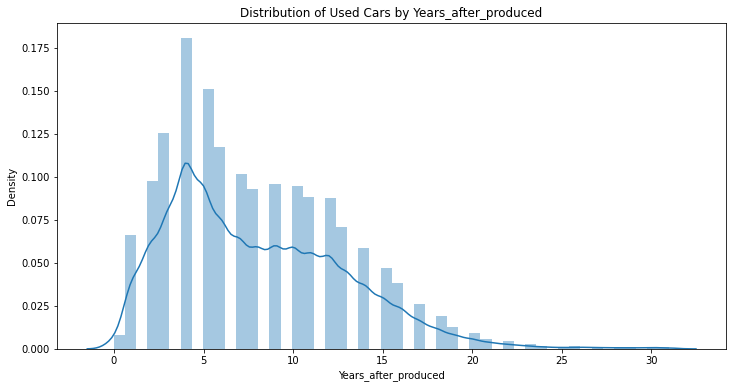

In [225]:
plt.figure(figsize = (12, 6))
sns.distplot(df.Years_after_produced)
plt.title('Distribution of Used Cars by Years_after_produced')
plt.show()

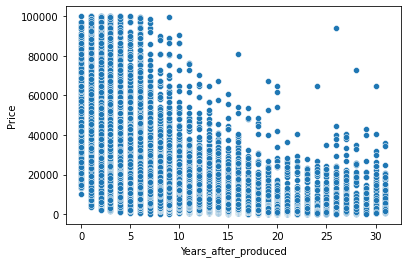

In [226]:
sns.scatterplot(data = df, x = 'Years_after_produced', y = 'Price')

##### 2.1.c Mileage_km

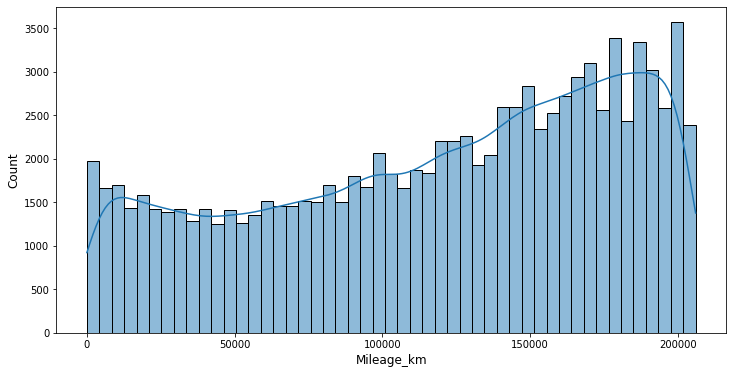

In [227]:
hist('Mileage_km', 12, 6)

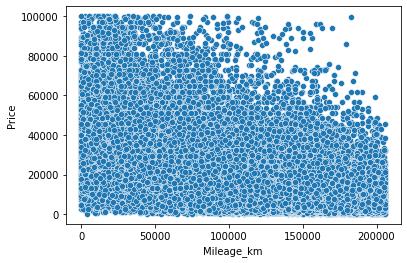

In [228]:
sns.scatterplot(data = df, x = 'Mileage_km', y = 'Price')

##### 2.1.d Power_HP

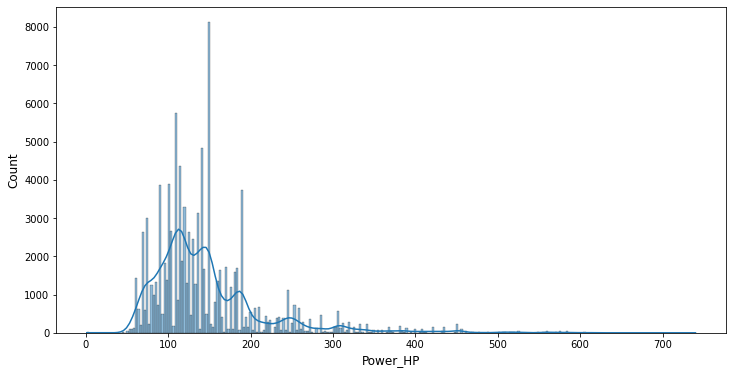

In [229]:
hist('Power_HP', 12, 6)

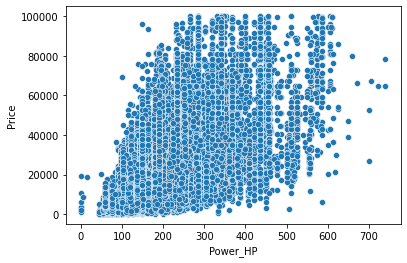

In [230]:
sns.scatterplot(data = df, x = 'Power_HP', y = 'Price')

##### 2.1.e Displacement_cm3

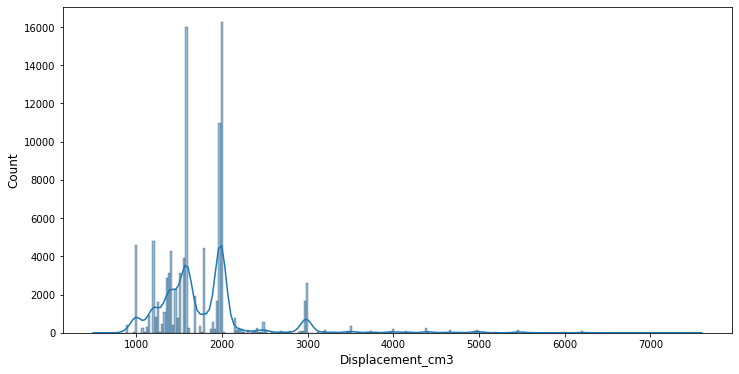

In [231]:
hist('Displacement_cm3', 12, 6)

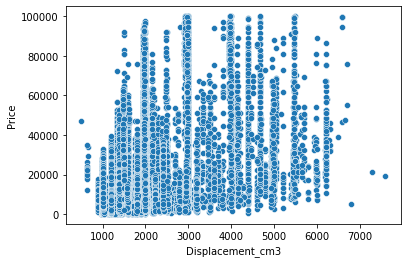

In [232]:
sns.scatterplot(data = df, x = 'Displacement_cm3', y = 'Price')

### 2.2 범주형 변수('Fuel_type', 'brand', 'Model', 'Drive', 'Transmission', 'Type', 'Doors_number', 'Colour', 'Num_options', 'Num_cylinders','newcar_avgprice_by_brand')

In [233]:
def graphs (col):
  group_bar(col, 15, 6)
  plt.title(f'Number of Used Cars by {col}', fontsize = 15)
  plt.show()

  group_mean(col, 15, 6)
  plt.title(f'Mean Price of Used Car by {col}', fontsize = 15)
  plt.show()

##### 2.2.a Fuel_type

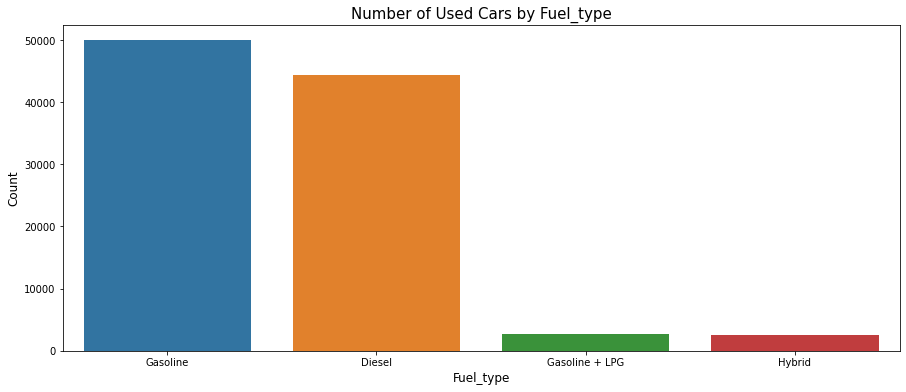

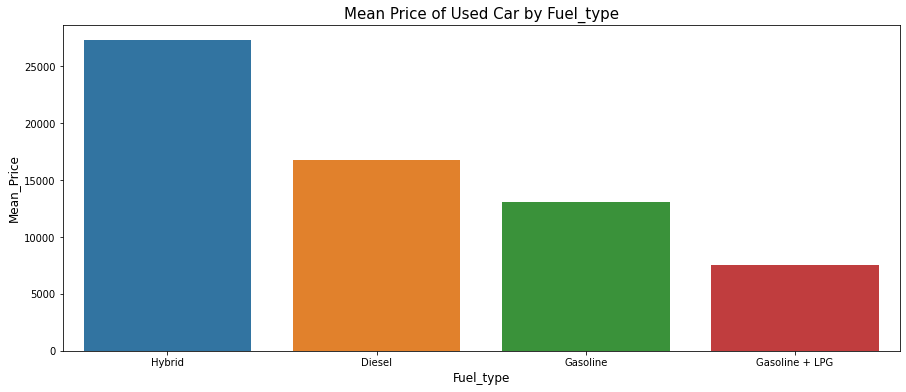

In [234]:
graphs ('Fuel_type')

##### 2.2.b Brand column

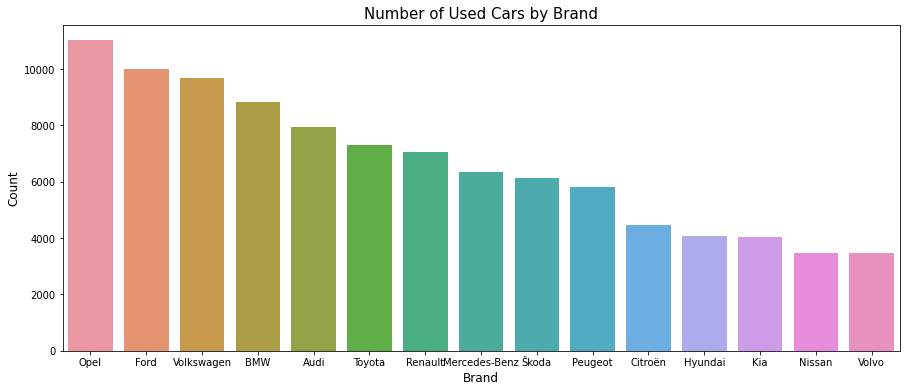

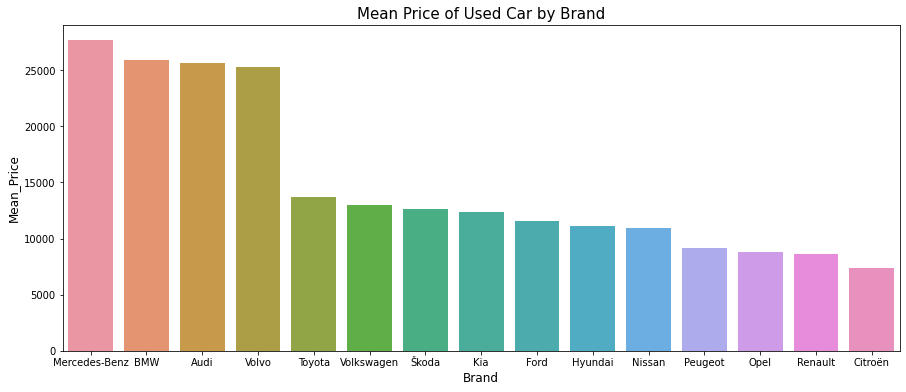

In [235]:
graphs('Brand')

##### 2.2.c Model Column

##### 2.2.d Drive

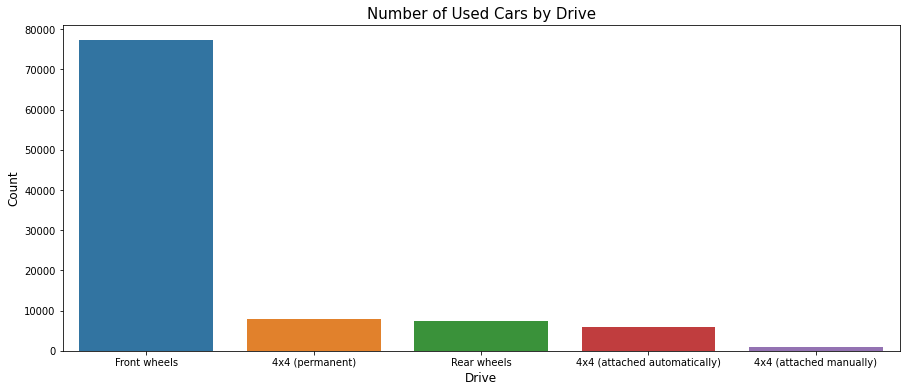

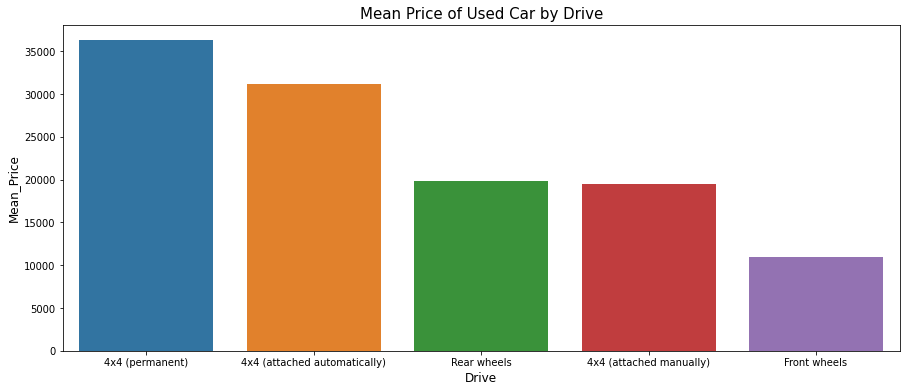

In [236]:
graphs('Drive')

##### 2.2.e Transmission

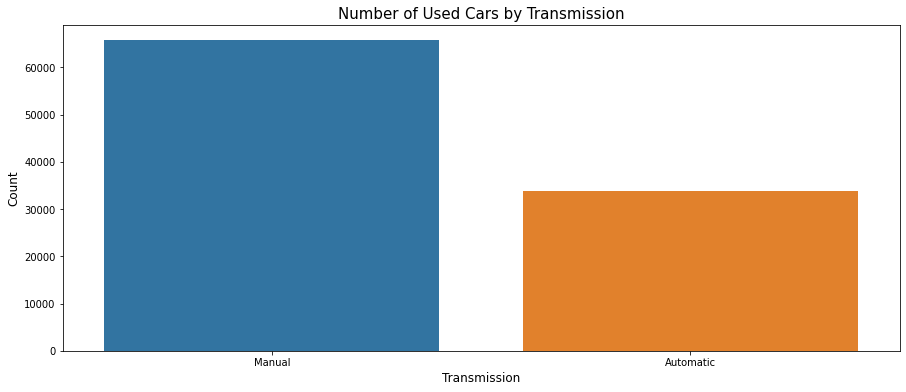

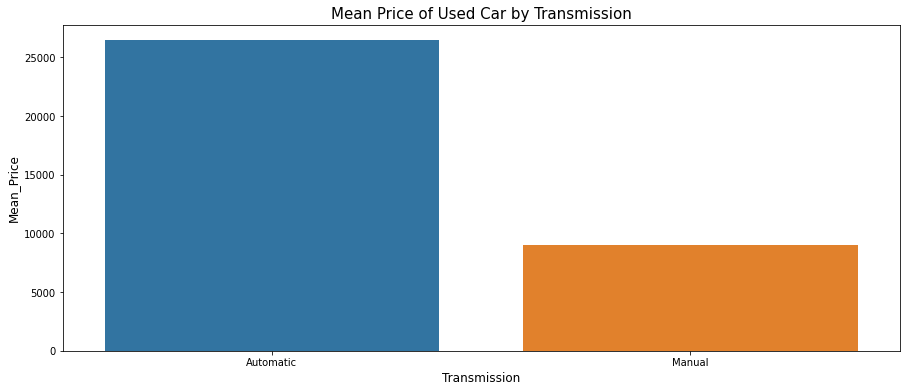

In [237]:
graphs('Transmission')

##### 2.2.f Type

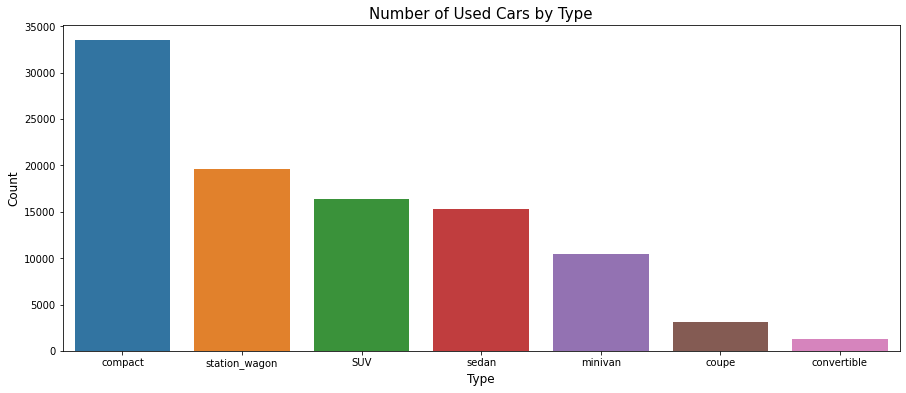

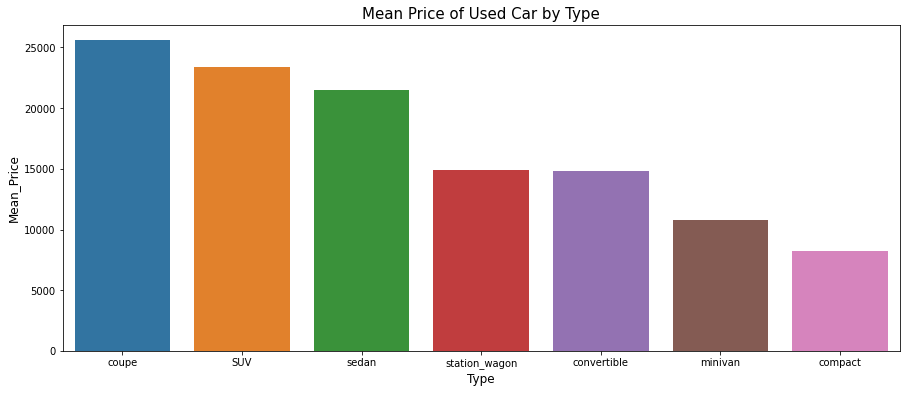

In [238]:
graphs('Type')

##### 2.2.g Doors_number

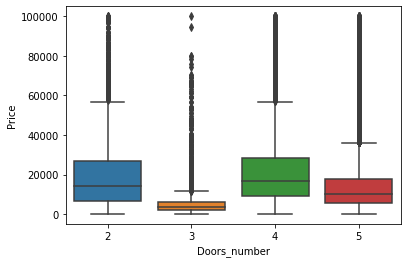

In [239]:
sns.boxplot(data = df, x = 'Doors_number', y = 'Price')

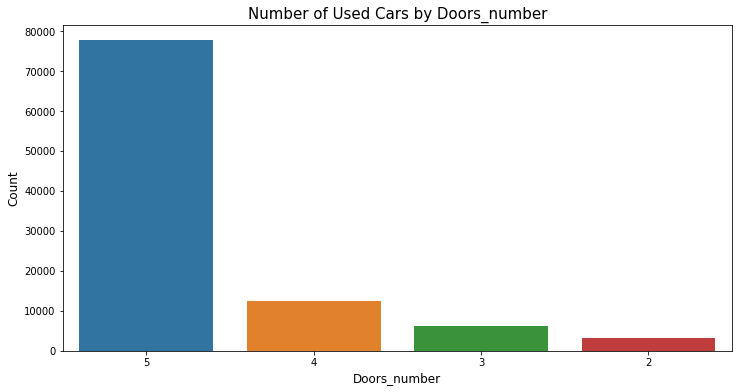

In [240]:
dataframe = pd.DataFrame(df.groupby('Doors_number')['Price'].count()).sort_values(by = 'Price', ascending = False).reset_index()
dataframe = dataframe.astype({'Doors_number' : 'str'})

plt.figure(figsize = (12, 6))
sns.barplot(data = dataframe, x = 'Doors_number', y = 'Price')
plt.xlabel('Doors_number', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Number of Used Cars by Doors_number', fontsize = 15)

plt.show()

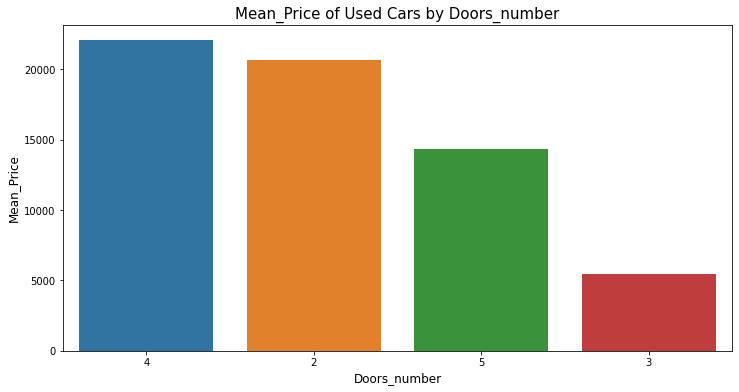

In [241]:
dataframe = pd.DataFrame(df.groupby('Doors_number')['Price'].mean()).sort_values(by = 'Price', ascending = False).reset_index()
dataframe = dataframe.astype({'Doors_number' : 'str'})

plt.figure(figsize = (12, 6))
sns.barplot(data = dataframe, x = 'Doors_number', y = 'Price')
plt.xlabel('Doors_number', fontsize = 12)
plt.ylabel('Mean_Price', fontsize = 12)
plt.title('Mean_Price of Used Cars by Doors_number', fontsize = 15)
plt.show()

##### 2.2.h Colour

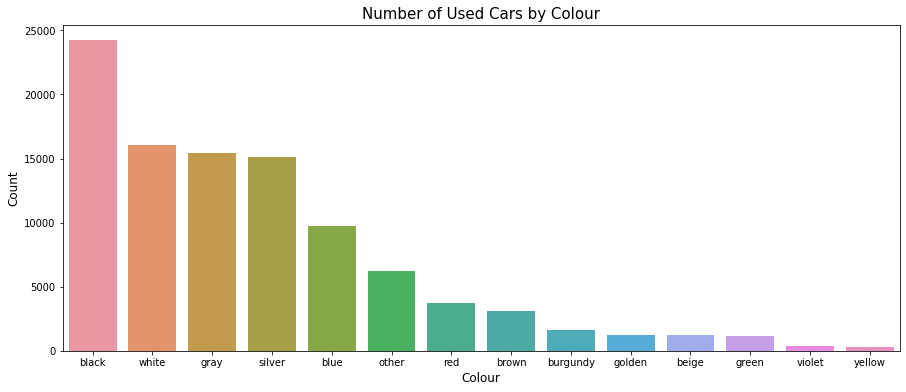

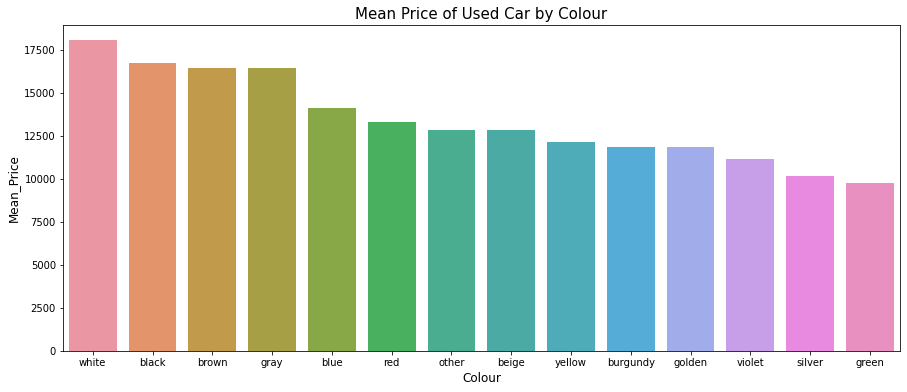

In [242]:
graphs('Colour')

##### 2.2.i Num_options

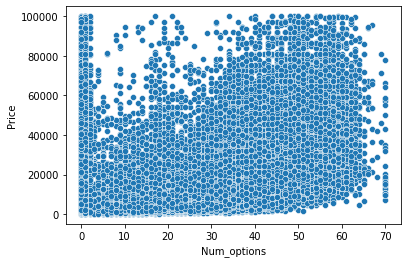

In [243]:
sns.scatterplot(data = df, x = 'Num_options', y = 'Price')

##### 2.2.a newcar_avgprice_by_brand

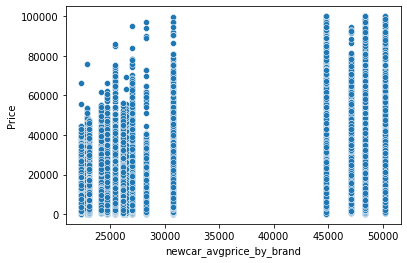

In [244]:
sns.scatterplot(data = df, x = 'newcar_avgprice_by_brand', y = 'Price')

#### 가설 1. 자동차 색상 선호가 가격에 영향을 미칠 것이다.


Text(0.5, 1.0, 'Top 3 Colour of Car World-Wide in 2021')

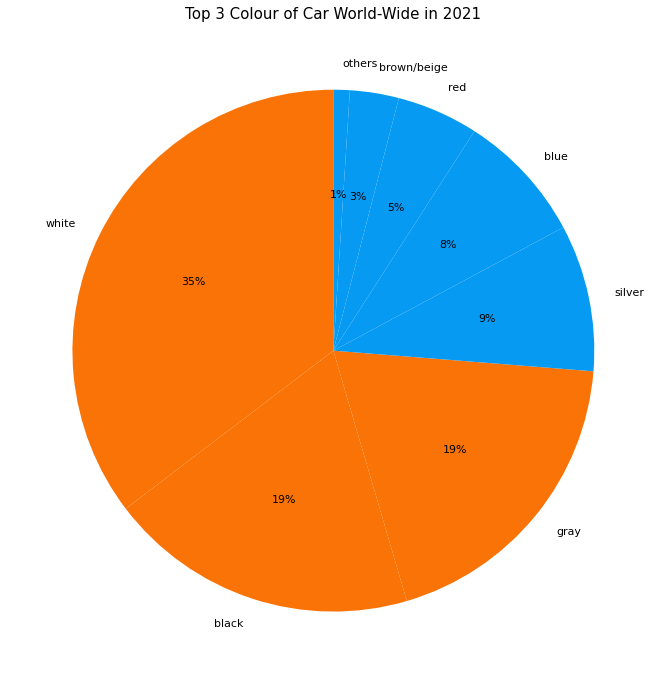

In [245]:
# 2021년 전세계 자동차 색상 선호도(출처: www.Axalta.com, 2021 Color Popularity Report)

world_color = ['white', 'black', 'gray', 'silver', 'blue', 'red', 'brown/beige', 'others']
percent = [35, 19, 19, 9, 8, 5, 3, 1]
color = ['#F97306', '#F97306', '#F97306', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
# explode = [0.0, 0.05, 0.05, 0, 0, 0, 0, 0]

plt.figure(figsize = (12, 12))
plt.pie(percent, labels = world_color, colors = color, autopct = '%.d%%'.format(),
        startangle = 90, textprops={'fontsize': 11})
plt.title('Top 3 Colour of Car World-Wide in 2021', fontsize = 15)

<Figure size 864x432 with 0 Axes>

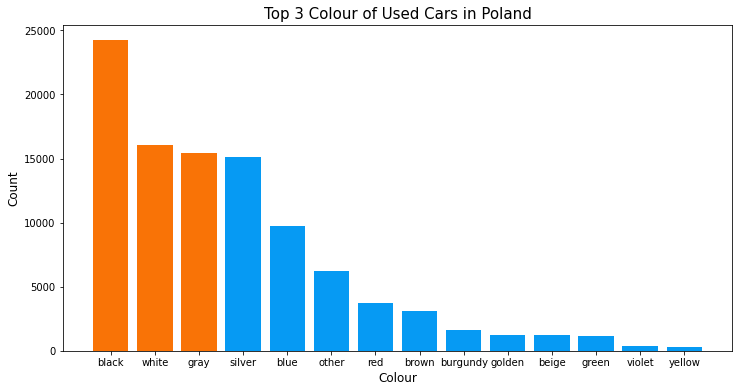

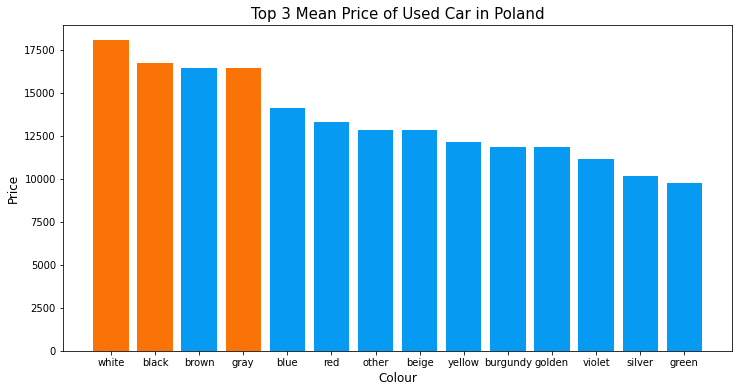

In [246]:
colour_price = pd.DataFrame(df.groupby('Colour')['Price'].mean()).sort_values(by = 'Price', ascending = False).reset_index()
color = ['#F97306', '#F97306', '#F97306', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
plt.figure(figsize = (12,6))

dataframe = pd.DataFrame(df.groupby('Colour')['Price'].count()).sort_values(by = 'Price', ascending = False).reset_index()
  
plt.figure(figsize = (12, 6))
plt.bar(data = dataframe, x = 'Colour', height = 'Price', color = color)
plt.xlabel('Colour', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Top 3 Colour of Used Cars in Poland', fontsize = 15)
plt.show()


color = ['#F97306', '#F97306', '#069AF3', '#F97306', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
plt.figure(figsize = (12,6))

plt.bar(data = colour_price, x = 'Colour', height = 'Price', color = color)
plt.xlabel('Colour', fontsize = 12)
plt.ylabel('Price', fontsize = 12)
plt.title('Top 3 Mean Price of Used Car in Poland', fontsize = 15)
plt.show()


#### 가설 2. 자동차 차종(Type) 선호가 중고차 가격에 영향을 미칠 것이다.

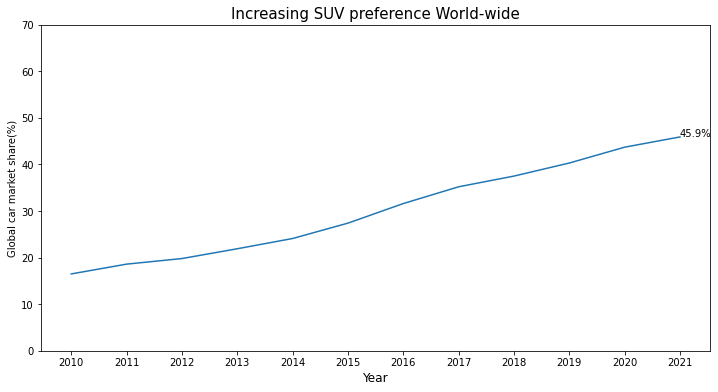

In [247]:
# 전세계 자동차 시장 중 SUV가 차지하는 비중 변화 (출처: iea.org)
year = list(range(2010, 2022))
percentage = [16.5, 18.6, 19.8, 21.9, 24.1,
              27.4, 31.6, 35.2, 37.5, 40.3, 43.7, 45.9]

plt.figure(figsize = (12, 6))
sns.lineplot(x = year, y = percentage)
plt.ylim(0, 70)
plt.xticks(year)
plt.annotate('45.9%', (2021, 46))
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Global car market share(%)')
plt.title('Increasing SUV preference World-wide', fontsize = 15)
plt.show()

Text(0.5, 1.0, 'Mean Price of Used SUV in Poland')

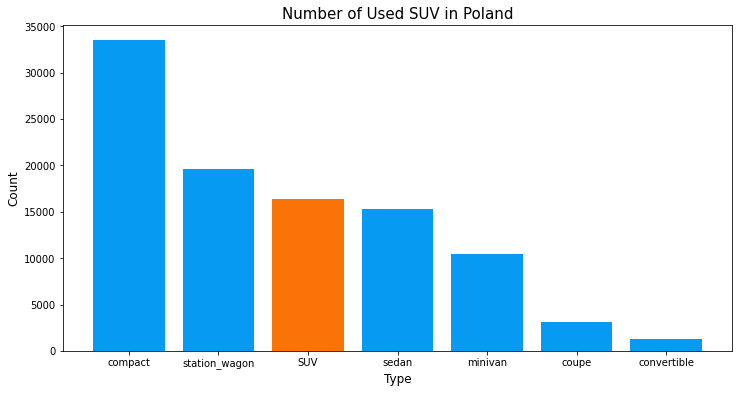

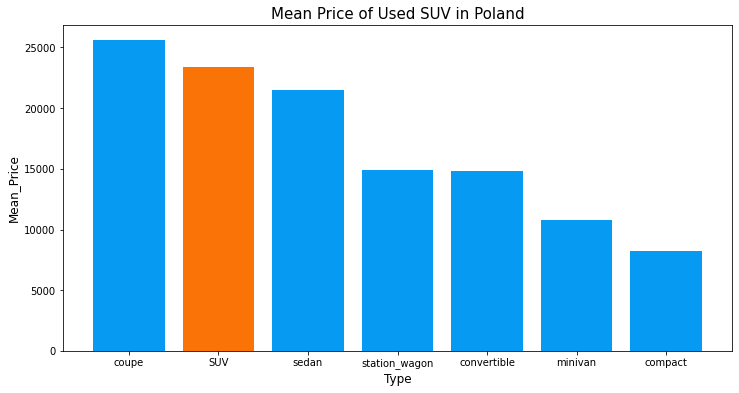

In [248]:
dataframe = pd.DataFrame(df.groupby('Type')['Price'].count()).sort_values(by = 'Price', ascending = False).reset_index()

color = ['#069AF3', '#069AF3', '#F97306', '#069AF3', '#069AF3', '#069AF3', '#069AF3']

plt.figure(figsize = (12, 6))
plt.bar(data = dataframe, x = 'Type', height = 'Price', color = color)
plt.xlabel('Type', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title('Number of Used SUV in Poland', fontsize = 15)

dataframe = pd.DataFrame(df.groupby('Type')['Price'].mean()).sort_values(by = 'Price', ascending = False).reset_index()

color = ['#069AF3', '#F97306', '#069AF3', '#069AF3', '#069AF3', '#069AF3', '#069AF3']
plt.figure(figsize = (12, 6))
plt.bar(data = dataframe, x = 'Type', height = 'Price', color = color)
plt.xlabel('Type', fontsize = 12)
plt.ylabel('Mean_Price', fontsize = 12)
plt.title('Mean Price of Used SUV in Poland', fontsize = 15)

####가설 3. 마력이 높을수록 가격이 높을 것이다.

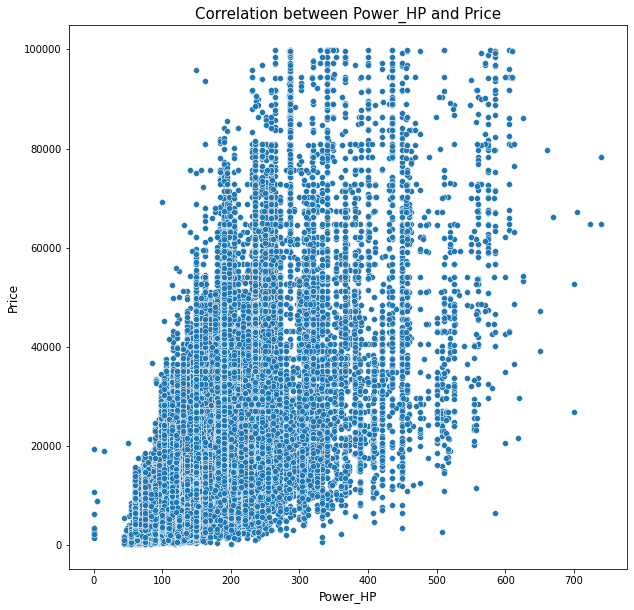

In [249]:
plt.figure(figsize = (10, 10))
sns.scatterplot(data = df, x = 'Power_HP', y = 'Price')
plt.xlabel('Power_HP', size = 12)
plt.ylabel('Price', size = 12)
plt.title('Correlation between Power_HP and Price', size = 15)
plt.show()

In [250]:
df.corr().loc['Power_HP', 'Price'].round(2)

0.67

### 2.3 Data leakage

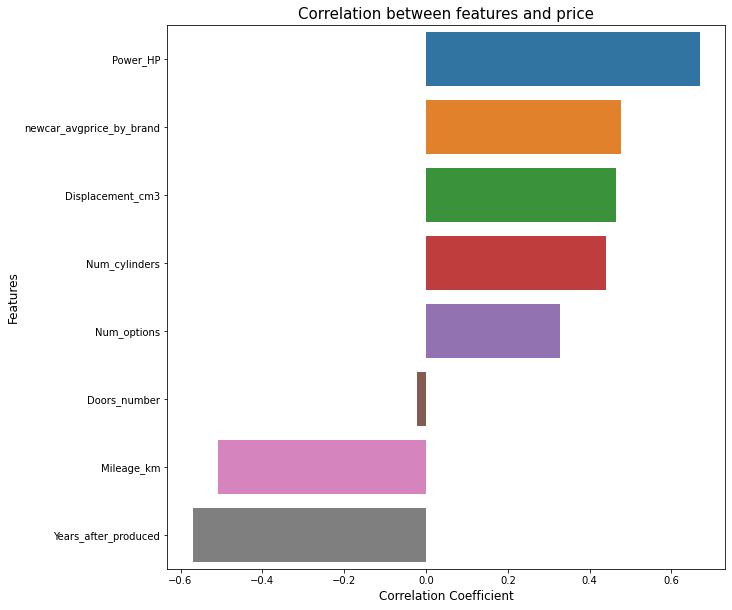

In [251]:
corr = pd.DataFrame(df.corr()['Price'].sort_values(ascending = False)).reset_index()

plt.figure(figsize = (10, 10))
sns.barplot(data = corr.iloc[1:,:], x = 'Price', y = 'index')
plt.xlabel('Correlation Coefficient', fontsize = 12)
plt.ylabel('Features', fontsize = 12)
plt.title('Correlation between features and price', fontsize = 15)
plt.show()



In [252]:
df.to_csv('section2_project.csv', index = False)